In [1]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import Dropout
from keras.layers import Flatten
from keras.layers.convolutional import Conv2D
from keras.layers.convolutional import MaxPooling2D
from keras import backend as K
from keras.utils import np_utils
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
import numpy as np
import pandas as pd
import cv2 as cv
from tensorflow.keras.callbacks import EarlyStopping

Using TensorFlow backend.


In [2]:
data = pd.read_csv("A-Z_ThinkTac_aplha.csv")

In [3]:
data.tail()

,label,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,...,7.74,7.75,7.76,7.77,7.78,7.79,7.8,7.81,7.82,7.83
2195,25.0,0.980392,0.984314,0.992157,0.992157,0.996078,0.996078,1.000000,0.996078,0.996078,...,0.984314,0.972549,0.980392,0.992157,0.992157,0.996078,0.996078,0.996078,0.996078,0.996078
2196,25.0,0.980392,0.968627,0.949020,0.921569,0.898039,0.874510,0.839216,0.796078,0.745098,...,0.984314,0.996078,1.000000,1.000000,1.000000,0.996078,0.996078,0.996078,0.996078,0.996078
2197,25.0,0.996078,0.996078,0.996078,0.992157,0.996078,0.996078,0.996078,0.988235,0.988235,...,0.992157,0.992157,0.988235,0.988235,0.992157,0.996078,1.000000,0.996078,0.992157,0.992157
2198,25.0,0.678431,0.545098,0.286275,0.317647,0.466667,0.584314,0.678431,0.749020,0.815686,...,0.062745,0.070588,0.274510,0.509804,0.733333,0.921569,0.972549,1.000000,0.996078,0.996078
2199,25.0,0.984314,0.988235,0.996078,0.992157,0.992157,0.992157,0.996078,0.992157,0.992157,...,0.113725,0.090196,0.105882,0.160784,0.607843,0.980392,0.996078,0.996078,0.992157,0.988235


In [4]:
big_letters = list(map(chr, range(ord('A'), ord('Z')+1)))

In [5]:
data.shape

(2200, 785)

In [6]:
data.head()

,label,0.0,0.01,0.02,0.03,0.04,0.05,0.06,0.07,0.08,...,7.74,7.75,7.76,7.77,7.78,7.79,7.8,7.81,7.82,7.83
0,0.0,1.000000,0.996078,0.996078,0.992157,0.992157,0.992157,0.992157,0.992157,0.992157,...,0.984314,0.988235,0.976471,0.968627,0.839216,0.647059,0.337255,0.047059,0.066667,0.082353
1,0.0,0.992157,0.992157,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.988235,...,0.996078,0.992157,0.996078,0.992157,0.996078,0.996078,0.992157,1.000000,1.000000,1.000000
2,0.0,0.988235,0.992157,0.996078,0.992157,0.984314,0.980392,0.980392,0.796078,0.431373,...,0.972549,0.980392,0.988235,0.988235,0.996078,0.996078,0.992157,0.984314,0.980392,0.976471
3,0.0,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.992157,0.992157,0.992157,...,0.886275,0.458824,0.050980,0.427451,0.788235,0.882353,0.941176,0.964706,0.968627,0.968627
4,0.0,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,0.996078,...,0.988235,0.996078,1.000000,0.992157,0.984314,0.976471,0.968627,0.972549,0.976471,0.980392


In [7]:
data.rename(columns={'0':'label'}, inplace=True)

In [9]:
print(data.head(1))

   label  0.0      0.01      0.02      0.03      0.04      0.05      0.06  \
0    0.0  1.0  0.996078  0.996078  0.992157  0.992157  0.992157  0.992157   

       0.07      0.08  ...      7.74      7.75      7.76      7.77      7.78  \
0  0.992157  0.992157  ...  0.984314  0.988235  0.976471  0.968627  0.839216   

       7.79       7.8      7.81      7.82      7.83  
0  0.647059  0.337255  0.047059  0.066667  0.082353  

[1 rows x 785 columns]


In [10]:
X , y = data.drop('label',axis=1), data['label']

In [11]:
data.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
label,2200.0,7.547727,6.793283,0.000000,1.000000,3.000000,14.000000,25.0
0.0,2200.0,0.977499,0.103927,0.011765,0.992157,0.996078,0.996078,1.0
0.01,2200.0,0.974296,0.104731,0.007843,0.992157,0.992157,0.996078,1.0
0.02,2200.0,0.966070,0.122353,0.011765,0.988235,0.992157,0.996078,1.0
0.03,2200.0,0.956164,0.146599,0.015686,0.988235,0.992157,0.996078,1.0
...,...,...,...,...,...,...,...,...
7.79,2200.0,0.926428,0.191449,0.050980,0.984314,0.992157,0.996078,1.0
7.8,2200.0,0.943182,0.163014,0.054902,0.988235,0.992157,0.996078,1.0
7.81,2200.0,0.957615,0.141521,0.031373,0.988235,0.996078,0.996078,1.0
7.82,2200.0,0.966964,0.121195,0.047059,0.992157,0.996078,0.996078,1.0


In [12]:
(X_train, X_test, Y_train, Y_test) = train_test_split(X, y,test_size=0.2)

In [13]:
standard_scaler = MinMaxScaler()
standard_scaler.fit(X_train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [14]:
X_train = standard_scaler.transform(X_train)
X_test = standard_scaler.transform(X_test)

In [15]:
X_train = X_train.reshape((X_train.shape[0], 28, 28, 1)).astype('float32')
X_test = X_test.reshape((X_test.shape[0], 28, 28, 1)).astype('float32')

In [16]:
print(X_train.shape)

(1760, 28, 28, 1)


In [20]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=2)

In [21]:
Y_train = np_utils.to_categorical(Y_train)
Y_test = np_utils.to_categorical(Y_test)

In [22]:
print(Y_test.shape)

(440, 26)


In [23]:
num_classes = Y_test.shape[1]
num_classes

26

In [24]:
model = Sequential()

In [25]:
model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(64, (5, 5), input_shape=(28, 28, 1), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [26]:
model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(Conv2D(128, (3, 3), activation='relu', data_format="channels_last", padding="same"))
model.add(MaxPooling2D(pool_size=(2, 2)))

In [27]:
model.add(Dropout(0.2))

In [28]:
model.add(Flatten())
model.add(Dense(128, activation='relu'))
model.add(Dense(num_classes, activation='softmax'))

In [29]:

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, Y_train, validation_data=(X_test, Y_test), epochs=20, batch_size=256, verbose=1,callbacks=[early_stop])

Train on 1760 samples, validate on 440 samples
Epoch 1/20
1760/1760 [==============================] - 13s 7ms/step - loss: 2.8368 - accuracy: 0.2369 - val_loss: 2.8187 - val_accuracy: 0.1432
Epoch 2/20
1760/1760 [==============================] - 12s 7ms/step - loss: 2.4411 - accuracy: 0.1903 - val_loss: 2.0110 - val_accuracy: 0.3500
Epoch 3/20
1760/1760 [==============================] - 12s 7ms/step - loss: 2.0759 - accuracy: 0.3227 - val_loss: 2.0216 - val_accuracy: 0.3523
Epoch 4/20
1760/1760 [==============================] - 12s 7ms/step - loss: 2.0274 - accuracy: 0.3761 - val_loss: 2.0049 - val_accuracy: 0.4455
Epoch 5/20
1760/1760 [==============================] - 12s 7ms/step - loss: 1.9771 - accuracy: 0.4398 - val_loss: 1.9179 - val_accuracy: 0.5023
Epoch 6/20
1760/1760 [==============================] - 12s 7ms/step - loss: 1.8860 - accuracy: 0.4693 - val_loss: 1.7594 - val_accuracy: 0.5045
Epoch 7/20
1760/1760 [==============================] - 13s 7ms/step - loss: 1.7098

In [30]:
scores = model.evaluate(X_test,Y_test, verbose=1)
print("CNN Error: %.2f%%" % (100-scores[1]*100))

440/440 [==============================] - 1s 2ms/step
CNN Error: 15.00%


In [31]:
model.save('weights.model')
model.save_weights("model_alpha.h5")

In [32]:
print(f"Accuracy : {(scores[1]*100)}")

Accuracy : 85.00000238418579


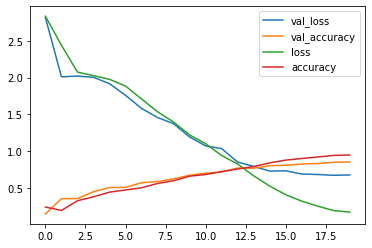

In [33]:
model_loss = pd.DataFrame(model.history.history)
model_loss.plot()

In [34]:
predictions = model.predict_classes(X_test)
predictions.shape

(440,)

In [38]:
!mkdir -p saved_model
model.save('saved_model/my_model1')

Saved model to disk
